# Entendendo a Quantização em Sinais Analógicos com um ADC

Neste notebook, exploraremos o processo de quantização em sinais analógicos utilizando um conversor analógico-digital (ADC). A quantização é um processo crucial em eletrônica digital, onde um sinal analógico contínuo é discretizado em valores digitais. 

Vamos analisar como a escolha do número de bits e da tensão de referência afetam a resolução e a fidelidade da representação digital. 

Ao final deste tutorial, você terá uma compreensão clara de como a quantização funciona e como isso impacta a representação de sinais analógicos em sistemas digitais de aquisião de dados.


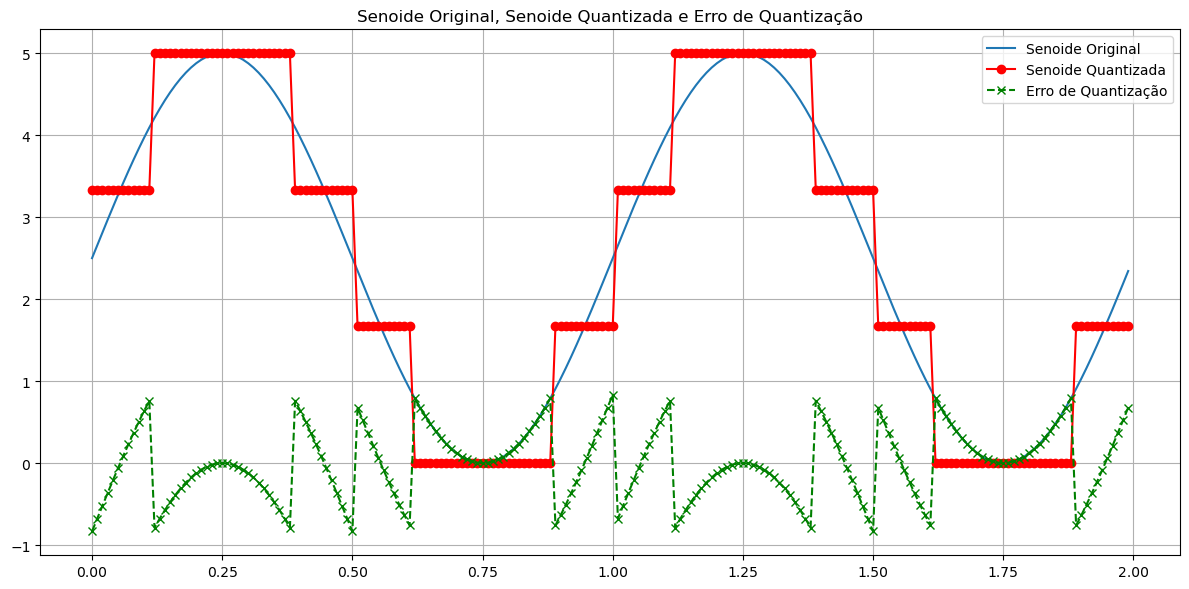

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
Vref = 5  # Tensão de referência (5V)
bits = 2  # Número de bits do conversor analógico-digital
amplitude = 2.5  # Amplitude da senoide (2.5V)
deslocamento = 2.5  # Deslocamento da senoide (2.5V)
frequencia = 1  # Frequência da senoide (1 Hz)
periodo = 1 / frequencia  # Período da senoide
taxa_amostragem = 100 * frequencia  # Taxa de amostragem (garante boa representação)

# Gere a senoide original
tempo = np.arange(0, 2 * periodo, 1 / taxa_amostragem)
senoide_original = amplitude * np.sin(2 * np.pi * frequencia * tempo) + deslocamento

# Quantização
intervalo_quantizacao = Vref / (2 ** bits - 1)
senoide_quantizada = np.round(senoide_original / intervalo_quantizacao) * intervalo_quantizacao

# Erro de Quantização
erro_quantizacao = senoide_original - senoide_quantizada

# Plote os resultados no mesmo eixo
plt.figure(figsize=(12, 6))
plt.plot(tempo, senoide_original, label='Senoide Original')
plt.plot(tempo, senoide_quantizada, label='Senoide Quantizada', color='red', marker='o', linestyle='-')
plt.plot(tempo, erro_quantizacao, label='Erro de Quantização', color='green', marker='x', linestyle='--')
plt.title('Senoide Original, Senoide Quantizada e Erro de Quantização')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
